## Part II - Communicate Data Findings Projct - PISA 2012. 
by Rajaa Rahil

### Investigation Overview


> In this investigation, the focus was on examining the impact of certain aspects of the study environment on student performance. The presentation will concentrate on three main features: gender, location, and the level of parent's education.


### Dataset Overview

> The dataset originally consisted of 485,490 students and 636 columns. After data wrangling, it was reduced to 286,907 entries and 11 columns. The columns include the three main features in addition to related variables such as Age, Study_Extra_Hours, Internet access, Computer availability, Mother_Edu_Level, Father_Edu_Level, and the average scores in Math, Reading, and Science.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load the cleaned dataset into a pandas dataframe
pisa = pd.read_csv('pisa_clean.csv')
pisa.head(1)

,Country,Age,Gender,Study_Extra_Hours,Internet,Computer,Mother_Edu_Level,Father_Edu_Level,Math_Score_Avg,Reading_Score_Avg,Science_Score_Avg
0,Albania,16.17,Female,Sometimes,No,No,Post-secondary non-tertiary,Post-secondary non-tertiary,366.18634,261.01424,371.91348


In [7]:
# convert Study_Extra_Hours, Mother_Edu_Level, and Father_Edu_Level into ordered categorical types
ordinal_var_dict = {'Study_Extra_Hours':['Never or rarely', 'Sometimes', 'Often', 'Always or almost always'],
                    'Mother_Edu_Level':['Early_childhood', 'Primary', 'Lower_secondary', 'Upper_secondary',
                                       'Post-secondary non-tertiary', "Bachelor's or equivalent",
                                       "Master's, Doctorate, or equivalent"],                    
                    'Father_Edu_Level':['Early_childhood', 'Primary', 'Lower_secondary', 'Upper_secondary',
                                       'Post-secondary non-tertiary', "Bachelor's or equivalent",
                                       "Master's, Doctorate, or equivalent"]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    pisa[var] = pisa[var].astype(ordered_var)

In [9]:
# Dataset of students with scores above 700 in each three subjects (math, reading, science)
math_hi_scr = pisa[pisa.Math_Score_Avg > 700]
reading_hi_scr = pisa[pisa.Reading_Score_Avg > 700]
science_hi_scr = pisa[pisa.Science_Score_Avg >=700]

In [11]:
def plot_relation(xvar,titles):
    
    plt.figure(figsize=[20, 5])
    base_color = sb.color_palette()[0]
    variables = ['Math_Score_Avg', 'Reading_Score_Avg', 'Science_Score_Avg']
    
    for i in range(len(variables)):
        var = variables[i]
        plt.subplot(1, 3, i+1)
        sb.boxplot(data = pisa, x = xvar, y = var, color = base_color)
        plt.title(titles[i])
        plt.xticks(rotation=90)

    plt.show();

#### Gender vs. outstanding students' performance in the three subjects.

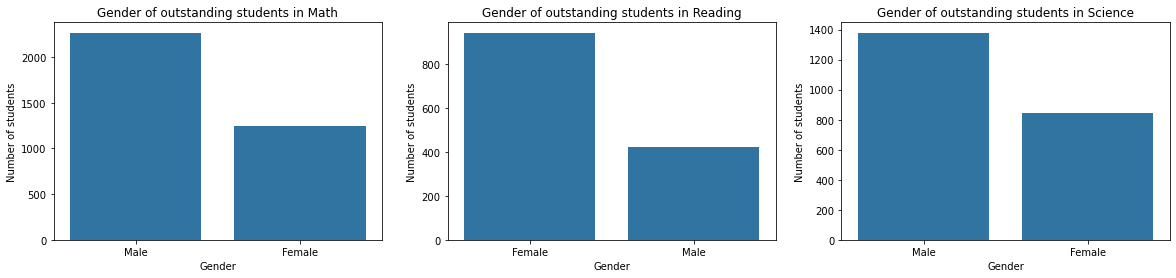

In [10]:
#plotting number students gender with high score in three subjects.

plt.figure(figsize=[20, 4])
orders_m = math_hi_scr['Gender'].value_counts().index
base_color = sb.color_palette()[0]

# Plotting No. of students' gender with Math high scores.
plt.subplot(1, 3, 1)
sb.countplot(data= math_hi_scr, x='Gender', color = base_color, order = orders_m)
plt.title('Gender of outstanding students in Math')
plt.ylabel('Number of students')

# Plotting No. of students' gender with Reading high scores.
plt.subplot(1, 3, 2)
orders_r = reading_hi_scr['Gender'].value_counts().index
sb.countplot(data= reading_hi_scr, x='Gender', color = base_color, order = orders_r)
plt.title('Gender of outstanding students in Reading')
plt.ylabel('Number of students')

# Plotting No. of students' gender with Science high scores.
plt.subplot(1, 3, 3)
orders_s = science_hi_scr['Gender'].value_counts().index

sb.countplot(data= science_hi_scr, x='Gender', color = base_color, order = orders_s)
plt.title('Gender of outstanding students in Science')
plt.ylabel('Number of students');

Male students performed strongly in Math and science subjects, while female students demonstrated significant reading performance, constituting the highest percentage of achievers.

#### Mothers' education levels vs. outstanding students' performance in the three subjects.

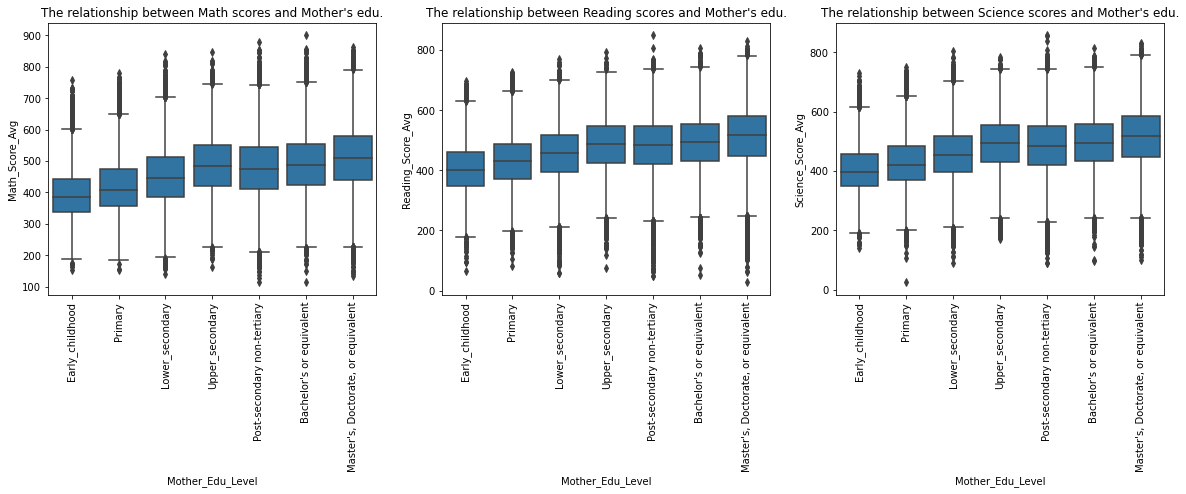

In [12]:
#Plotting the relationship between the average scores in three subjects and Mother's education.

relation_title = ["The relationship between Math scores and Mother's edu.",
          "The relationship between Reading scores and Mother's edu.",
          "The relationship between Science scores and Mother's edu."]

x_var = 'Mother_Edu_Level'
plot_relation(x_var,relation_title)

Students whose parents have only an Early_childhood education level demonstrate the lowest average scores in Math, Reading, and Science. In contrast, the highest scores are consistently observed among students whose parents hold a Master’s, Doctorate, or equivalent academic qualification. The distributions of scores for students whose parents completed Upper_secondary, Post-secondary non-tertiary, or Bachelor’s or equivalent levels are notably similar. 

These results suggests a significant achievement gap between the lowest and highest parental education categories, while mid-tier levels yield comparable academic outcomes. Overall, the data provides clear evidence of a positive association between higher parental education and enhanced student performance.

#### Fathers' education levels vs. outstanding students' performance in the three subjects.

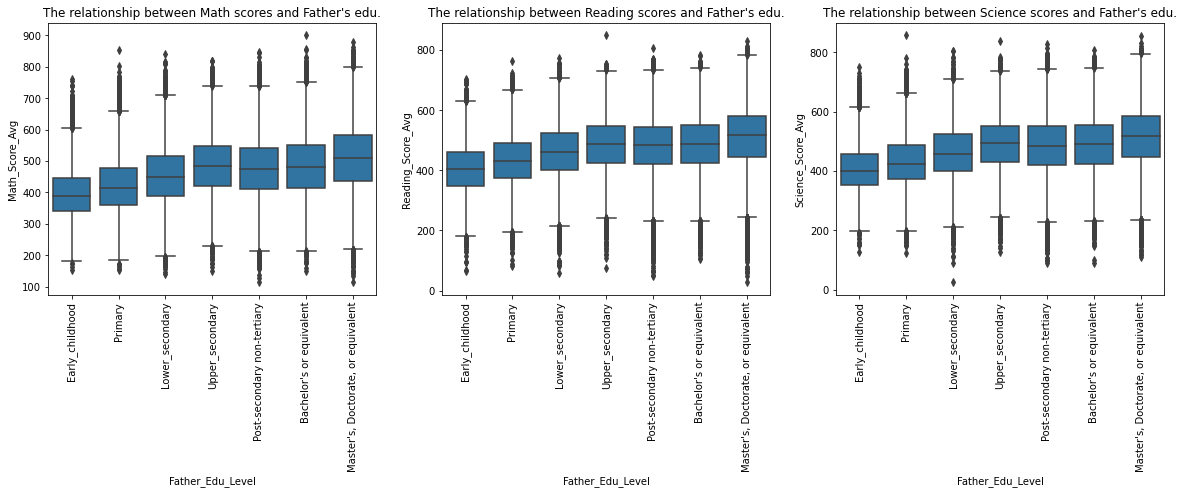

In [13]:
#Plotting the relationship between the average scores in three subjects and Father's education.

relation_title = ["The relationship between Math scores and Father's edu.",
          "The relationship between Reading scores and Father's edu.",
          "The relationship between Science scores and Father's edu."]

x_var = 'Father_Edu_Level'
plot_relation(x_var,relation_title)

The impact of fathers' education on students' academic performance appears to mirror that of mothers' education, with higher parental education levels generally associated with higher student scores. In other words, students tend to achieve better academic results when either parent's education level is advanced, and conversely, lower scores are often linked to lower parental education levels. This suggests that both parents' educational backgrounds play a significant role in influencing student achievement.

#### Effect the gender and country on outstanding students in Math subject.

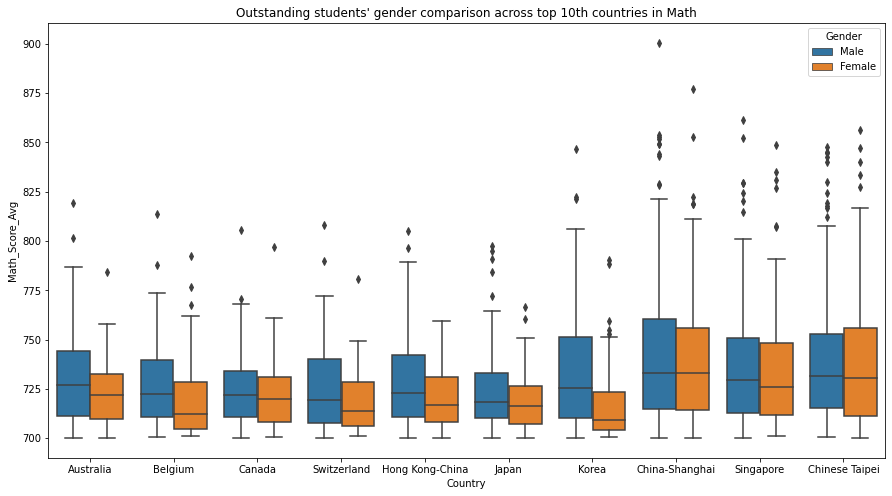

In [14]:
# Plotting outstanding students' gender across top 10th countries in Math.
count_lst = list(math_hi_scr.Country.value_counts().index)
math_country = math_hi_scr[math_hi_scr['Country'].isin(count_lst[:10])]

plt.figure(figsize=[15,8])
sb.boxplot(data= math_country, x='Country', y= 'Math_Score_Avg', hue = 'Gender')
plt.title("Outstanding students' gender comparison across top 10th countries in Math");

- This analysis compares the scores of high-achieving students in Math by gender in ten high-performing countries.
- Male students outnumber female students in all countries except Chinese Taipei, where females are overrepresented.
- In Singapore, the gender distribution is roughly equal, reflecting balanced participation. 
- In Korea, the number of high-achieving male students is nearly twice that of female students.
- China-Shanghai, Chinese Taipei, and Singapore have the highest number of students achieving high scores in Math.
- In most countries, males tend to have slightly higher mean scores and greater variance in Math scores than females.
- Outliers, students with exceptionally high scores, are more common among males, particularly in East Asian countries, indicating greater variation and high achievement. 
- The lowest quartile scores are aligned for both genders, indicating that the gender gap is most pronounced among high achievers.
- Cultural and national influences shape the patterns observed in math achievement, but notable gender disparities remain evident among high-achieving students.

#### Effect the gender and country on outstanding students in Reading subject.

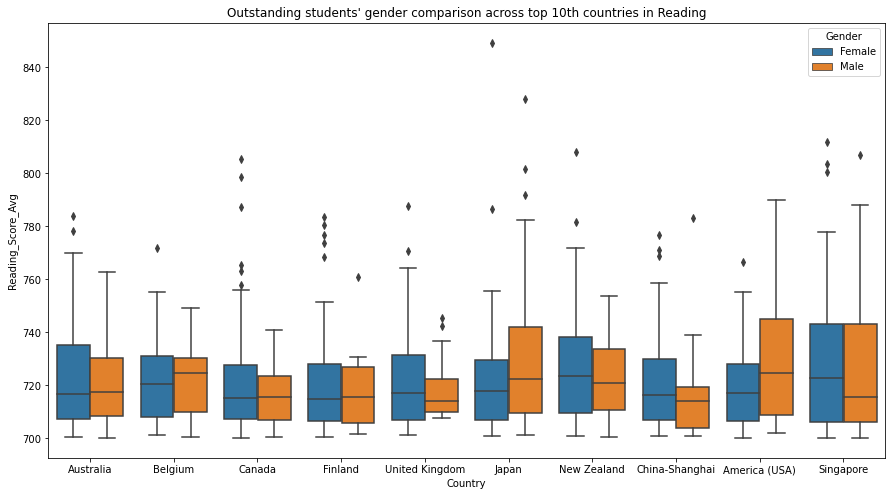

In [15]:
# Plotting outstanding students' gender across top 10th countries in Reading.

count_lst2 = list(reading_hi_scr.Country.value_counts().index)
reading_country = reading_hi_scr[reading_hi_scr['Country'].isin(count_lst2[:10])]

plt.figure(figsize=[15,8])
sb.boxplot(data= reading_country, x='Country', y= 'Reading_Score_Avg', hue = 'Gender')
plt.title("Outstanding students' gender comparison across top 10th countries in Reading");

- The image above shows a box plot comparing the reading scores of top-achieving students by gender in the top ten countries.
- In most countries, female students generally have higher median reading scores than male students, especially noticeable in countries like Australia, Belgium, Canada, Finland, and the United Kingdom.
- Japan, America (USA), and Singapore display much closer reading score distributions between genders, with medians nearly aligned, reflecting a smaller gender gap.
- Outliers—students with exceptionally high scores—are present for both genders but are more frequent among females in countries with a larger gender gap.
- China-Shanghai shows that females still outperform males.
- The chart confirms that the outstanding female students tend to excel in reading compared to their male counterparts in most top-performing countries, with gender differences being less significant in East Asian nations and the USA.

#### Effect the gender and country on outstanding students in Science subject.

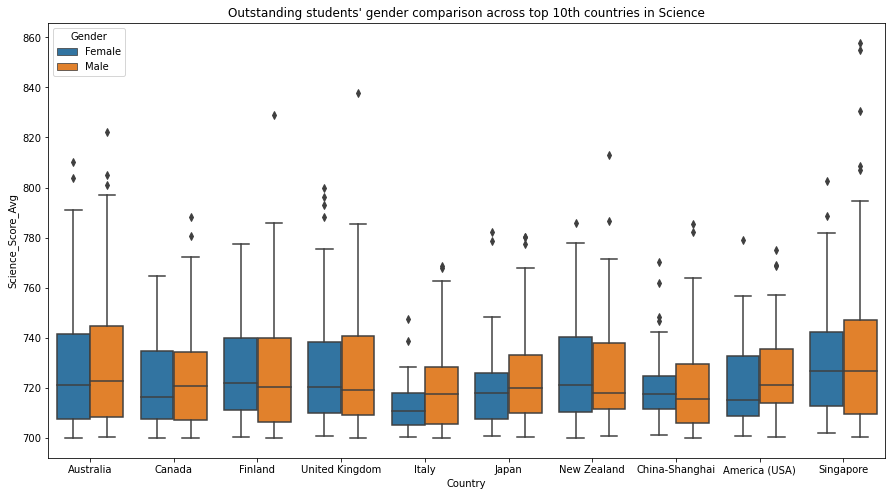

In [16]:
# Plotting outstanding students' gender across top 10th countries in Science.

count_lst3 = list(science_hi_scr.Country.value_counts().index)
science_country = science_hi_scr[science_hi_scr['Country'].isin(count_lst3[:10])]

plt.figure(figsize=[15,8])
sb.boxplot(data= science_country, x='Country', y= 'Science_Score_Avg', hue = 'Gender')
plt.title("Outstanding students' gender comparison across top 10th countries in Science");

- The image presents a box plot that compares outstanding students' science scores by gender (female in blue, male in orange) across the top ten countries.
- Australia, United Kingdom, and Singapore show slightly higher median science scores for males compared to females, but the gap is not pronounced.
- In Canada and Finland, both genders perform almost identically, while countries like Italy and Japan show a very slight advantage for males.
- China-Shanghai has lower median scores for both genders, with males slightly outperforming females.